# Pygor Tutorial

Welcome to the pygor3 Tutorial.

Pygor3 is an open source project and Python package that allows to analyze infer, evaluate and generate V(D)J sequences, by using IGoR's.

Pygor3 could help you to get simple calculations and visualizations of the statistics in VDJ recombination

# IgorModel

An IGoR model's encapsulates the Bayesian network probabilistic parameters of a V(D)J recombination process. 
IGoR is shipped with a set of default models.

As an example lets load the recombination model for a human $\beta$ T-cell receptor

In [1]:
import pygor3 as p3
mdl_hb = p3.get_default_IgorModel("human", "tcr_beta")

Reading Parms filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Reading Marginals filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt


In [2]:
mdl_hb['d_3_del']

<xarray.DataArray (d_gene: 3, d_5_del: 21, d_3_del: 21)>
array([[[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.19224e-01,
         2.89631e-01, 2.11165e-01],
        [0.00000e+00, 0.00000e+00, 6.86291e-08, ..., 1.38170e-01,
         3.02534e-01, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 1.09220e-03, ..., 4.41026e-02,
         0.00000e+00, 0.00000e+00],
        ...,
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00]],

       [[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.11468e-03,
         5.71094e-03, 7.95666e-02],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.50811e-02,
         8.09057e-02, 7.76708e-01],
        [0.00000e+00, 0.00000e+00, 3.94418e-06, ..., 2.35577e-03,
         5.88810e-02, 7.62736e-02],
...
        [0.00000e+00, 0.00000e+00, 1.25405e-01, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00]],

       [[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.51398e-04,
         1.89857e-02, 6.63111e-01],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.29730e-02,
         2.58015e-02, 9.39715e-01],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.20776e-02,
         1.25424e-01, 1.52907e-01],
        ...,
        [0.00000e+00, 0.00000e+00, 1.62236e-01, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00]]])
Coordinates:
  * d_gene        (d_gene) int64 0 1 2
    lbl__d_gene   (d_gene) object ' TRBD1*01' ' TRBD2*01' ' TRBD2*02'
    seq__d_gene   (d_gene) object 'GGGACAGGGGGC' ... 'GGGACTAGCGGGAGGG'
  * d_5_del       (d_5_del) int64 0 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20
    lbl__d_5_del  (d_5_del) int64 -4 -3 -2 -1 0 1 2 3 ... 9 10 11 12 13 14 15 16
  * d_3_del       (d_3_del) int64 0 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20
    lbl__d_3_del  (d_3_del) int64 -4 -3 -2 -1 0 1 2 3 ... 9 10 11 12 13 14 15 16
Attributes:
    nickname:    d_3_del
    event_type:  Deletion
    seq_type:    D_gene
    seq_side:    Three_prime
    priority:    5
    parents:     ['d_gene', 'd_5_del']
    childs:      []

## Bayesian Network

To visualize the composition of the Bayesina network we can use

<AxesSubplot:>

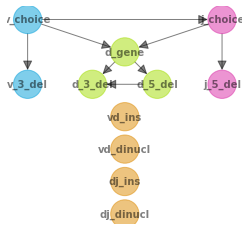

In [3]:
mdl_hb.plot_Bayes_network()

Similarly we can do the same for a human $\alpha$ T-cell receptor

Reading Parms filename from:  /home/olivares/.local/share/igor/models/human/tcr_alpha/models/model_parms.txt
Reading Marginals filename from:  /home/olivares/.local/share/igor/models/human/tcr_alpha/models/model_marginals.txt


<AxesSubplot:>

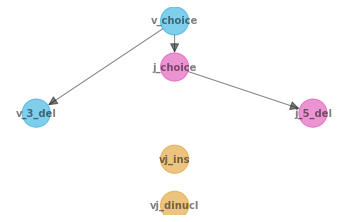

In [4]:
mdl_ha = p3.get_default_IgorModel("human", "tcr_alpha")
mdl_ha.plot_Bayes_network()

Notice that for a $\beta$ T-cell receptor we get a VDJ model and for the $\alpha$ only a VJ.

An IgorModel internally has two structure based in IGoR's model files:
 - model_parms.txt that contains the information about the events name, nickname, priority, and the dependencies between each other.
 - model_marginals.txt which contains the conditional probabilities for each event.
 - CDR3 anchors files.

## IgorModel_Parms

In [5]:
print(mdl_hb)

.xdata['v_3_del', 'j_choice', 'd_5_del', 'vd_dinucl', 'dj_dinucl', 'd_gene', 'v_choice', 'd_3_del', 'j_5_del', 'dj_ins', 'vd_ins']


In [6]:
mdl_hb.parms, mdl_hb.marginals

(<pygor3.IgorIO.IgorModel_Parms at 0x7fac64302950>,
 <pygor3.IgorIO.IgorModel_Marginals at 0x7fac6459d710>)

To get a pandas dataframe of the realizations of an event just use the nickname of the event.

In [7]:
mdl_hb.parms['d_gene']

,value,name
id,,
0,GGGACAGGGGGC,TRBD1*01
1,GGGACTAGCGGGGGGG,TRBD2*01
2,GGGACTAGCGGGAGGG,TRBD2*02


In [8]:
event = mdl_hb.parms.get_Event('d_gene')
event.to_dict()

{'event_type': 'GeneChoice',
 'seq_type': 'D_gene',
 'seq_side': 'Undefined_side',
 'priority': 6,
 'realizations': [{'id': 0, 'value': 'GGGACAGGGGGC', 'name': ' TRBD1*01'},
  {'id': 1, 'value': 'GGGACTAGCGGGGGGG', 'name': ' TRBD2*01'},
  {'id': 2, 'value': 'GGGACTAGCGGGAGGG', 'name': ' TRBD2*02'}],
 'name': 'GeneChoice_D_gene_Undefined_side_prio6_size3',
 'nickname': 'd_gene'}

All parameters of the events have 3 columns id, value and name. For the GeneChoice events like 'd_gene'(above) the value is the sequence and the name the description of the sequence and for Deletion events like 'd_3_del' the value is an integer of the posible deletions. 

In [9]:
mdl_hb.parms['d_3_del']

,value,name
id,,
0,-4,
1,-3,
2,-2,
3,-1,
4,0,
5,1,
6,2,
7,3,
8,4,


Notice that for Deletion event negative values mean palidromic insertions

Aditionally the anchors dataframe are stores in parms.df_V_anchors for CDR3 V anchors and parms.df_J_anchors for J with gene (gene name) as index in

In [10]:
mdl_hb.parms.df_J_anchors

,anchor_index
gene,
K02545|TRBJ1-1*01|Homo sapiens|F|J-REGION|749..796|48 nt|3| | | | |48+0=48| | |,17
K02545|TRBJ1-2*01|Homo sapiens|F|J-REGION|886..933|48 nt|3| | | | |48+0=48| | |,17
M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499..1548|50 nt|2| | | | |50+0=50| | |,19
M14158|TRBJ1-4*01|Homo sapiens|F|J-REGION|2095..2145|51 nt|3| | | | |51+0=51| | |,20
M14158|TRBJ1-5*01|Homo sapiens|F|J-REGION|2368..2417|50 nt|2| | | | |50+0=50| | |,19
M14158|TRBJ1-6*01|Homo sapiens|F|J-REGION|2859..2911|53 nt|2| | | | |53+0=53| | |,22
L36092|TRBJ1-6*02|Homo sapiens|F|J-REGION|643043..643095|53 nt|2| | | | |53+0=53| | |,22
X02987|TRBJ2-1*01|Homo sapiens|F|J-REGION|800..849|50 nt|2| | | | |50+0=50| | |,19
X02987|TRBJ2-2*01|Homo sapiens|F|J-REGION|995..1045|51 nt|3| | | | |51+0=51| | |,20


## IgorModel_Marginals

IgorModel_Marginals contains the conditional probabilities for each event. 

> :ATTENTION: **IGoR's model_marginals.txt stores conditional probabilities of the defined events, not marginals probabilities.**

The conditional probability as a numpy array can be access with

In [11]:
mdl_hb.marginals['j_choice']

array([[1.28586e-01, 1.04003e-01, 4.10916e-02, ..., 0.00000e+00,
        5.36364e-02, 3.73186e-02],
       [1.66126e-01, 7.89615e-02, 1.13701e-02, ..., 2.46074e-02,
        6.49049e-02, 7.46140e-02],
       [1.66156e-01, 7.90103e-02, 1.13744e-02, ..., 2.45354e-02,
        6.49334e-02, 7.46554e-02],
       ...,
       [1.24050e-01, 4.76394e-02, 0.00000e+00, ..., 3.52196e-02,
        5.51254e-02, 6.01472e-02],
       [3.64941e-06, 2.04721e-09, 0.00000e+00, ..., 3.41728e-01,
        6.84855e-02, 8.22442e-02],
       [1.06077e-01, 1.13773e-01, 4.03129e-02, ..., 2.20679e-02,
        7.16947e-02, 5.81105e-02]])

## DataArrays with parms and marginals

The mdl_hb object encapsulates the information about IGoR's model, like the Bayes network and the corresponding conditional probabilities for each event and the information about the parms and marginals can be access directly from the xarray in IgorModel without using IgorModel_Parms and IgorModel_Marginals like

## Conditional probabilities

To get the conditional probabilities associated with this model we can the DataArray as

IgorModel['event_nickname']

For instance from this Bayesian network, we can see that for this model the choice of V ('v_choice') or the number of insertions between the V and D segments are independent of the rest of events. Hence, 

$P(\text{v_choice})$ = mdl_hb['v_choice']

However, for events like 'd_gene' or 'j_5_del' there are some conditional dependencies, therefore the notation in pygor 

$P(\text{d_gene}| \text{v_choice}, \text{j_choice})$ = mdl_hb['d_gene']

The get the dependencies information there is variable parents as attribute

In [12]:
mdl_hb['v_choice']

<xarray.DataArray (v_choice: 89)>
array([4.88741e-03, 9.32369e-03, 9.32259e-03, 1.30320e-02, 3.43430e-04,
       8.50694e-03, 7.71250e-03, 6.12276e-04, 5.06104e-03, 4.59289e-05,
       4.48245e-03, 8.16181e-03, 7.00053e-04, 7.77164e-03, 1.16174e-02,
       1.16158e-02, 1.13872e-02, 1.06555e-02, 2.36870e-03, 2.28368e-02,
       1.56715e-04, 4.58447e-03, 0.00000e+00, 4.88782e-05, 0.00000e+00,
       1.54500e-02, 2.74050e-02, 5.18979e-03, 4.80289e-03, 1.62765e-01,
       6.61229e-02, 2.07174e-02, 7.36226e-04, 2.47846e-37, 1.07472e-02,
       2.03820e-02, 9.53245e-03, 9.53006e-03, 2.35607e-03, 2.39208e-03,
       2.39208e-03, 2.45219e-03, 1.66904e-02, 2.98807e-03, 2.98804e-03,
       1.59156e-02, 1.25468e-02, 9.06711e-03, 9.06936e-03, 9.76534e-02,
       9.57746e-03, 9.17011e-03, 1.14472e-02, 1.14458e-02, 9.77554e-03,
       1.89924e-02, 3.97949e-04, 1.70242e-03, 8.91336e-03, 6.73926e-03,
       6.69167e-03, 2.94257e-02, 1.38534e-02, 4.19227e-03, 4.19275e-03,
       2.48630e-03, 4.83399e-04, 1.29795e-07, 6.49975e-05, 1.94736e-02,
       1.94728e-02, 0.00000e+00, 3.91595e-03, 3.96230e-02, 0.00000e+00,
       0.00000e+00, 6.73805e-05, 2.90073e-02, 9.28490e-03, 5.32118e-03,
       8.18432e-03, 1.07035e-03, 3.64764e-04, 3.26790e-03, 3.26801e-03,
       3.26801e-03, 3.26809e-03, 8.23600e-04, 1.56399e-02])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    lbl__v_choice  (v_choice) object 'U66059|TRBV1*01|Homo sapiens|P|V-REGION...
    seq__v_choice  (v_choice) object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACA...
Attributes:
    nickname:    v_choice
    event_type:  GeneChoice
    seq_type:    V_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     []
    childs:      ['v_3_del', 'd_gene', 'j_choice']

You can plot directly from the xarray

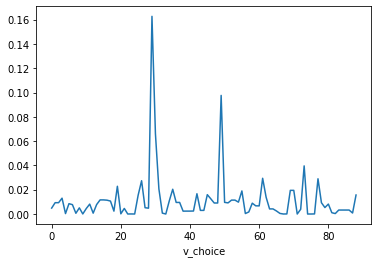

In [13]:
mdl_hb['v_choice'].plot()

Or use the a model method to get the plot with the corresponding labels.

(<Figure size 1296x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'$P($v_choice$)$'}>)

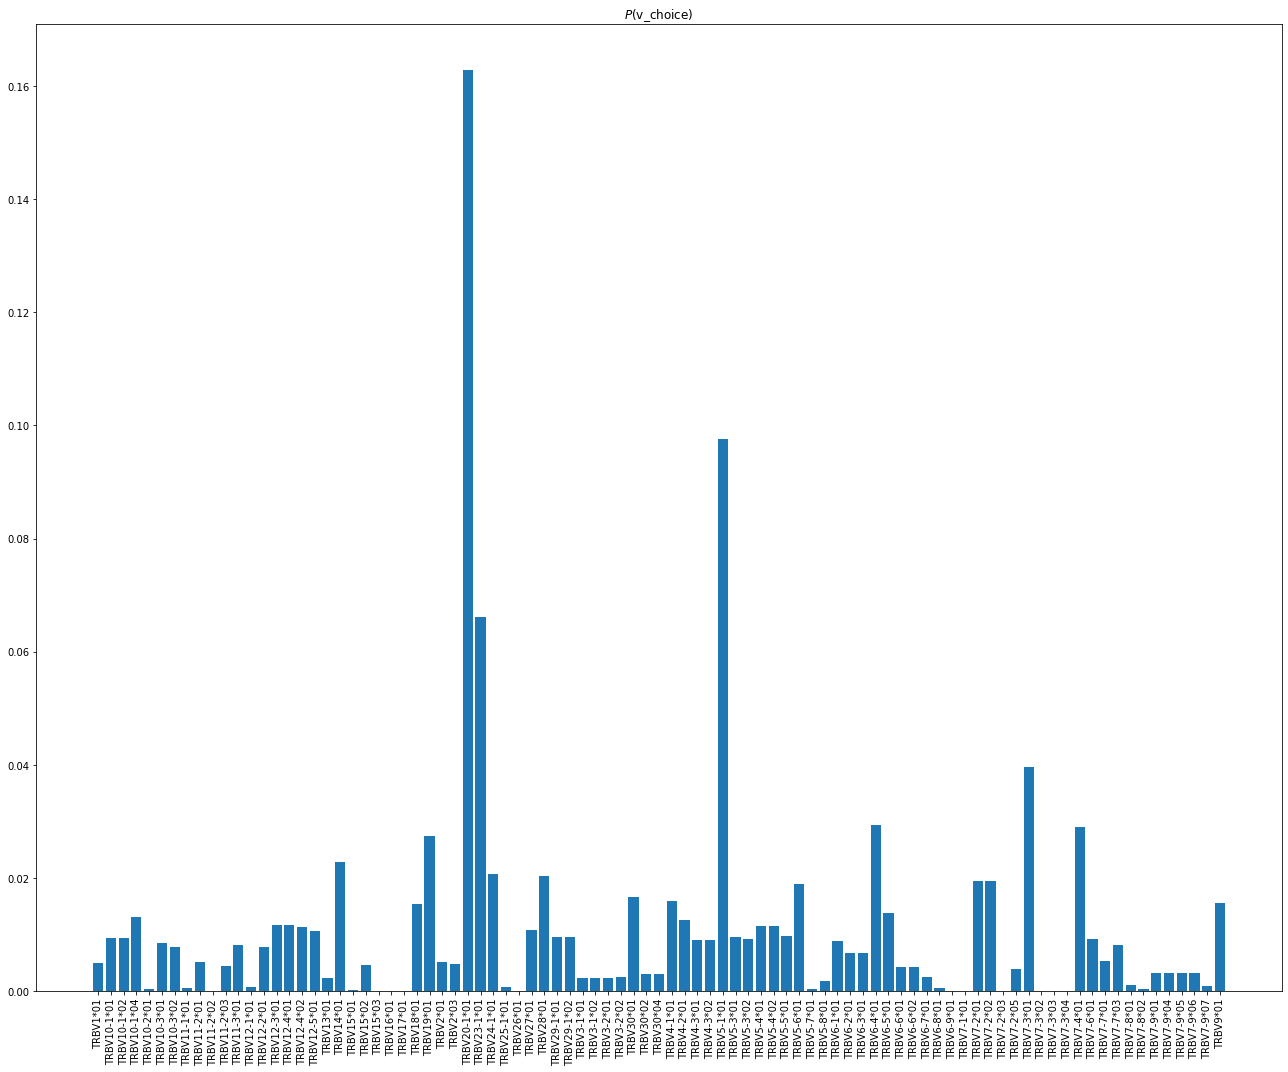

In [14]:
mdl_hb.plot_Event('v_choice')

(<Figure size 720x1440 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$P($d_gene$ = $  TRBD1*01 $|$v_choice,j_choice$)$'}, xlabel='j_choice', ylabel='v_choice'>,
        <AxesSubplot:title={'center':'$P($d_gene$ = $  TRBD2*01 $|$v_choice,j_choice$)$'}, xlabel='j_choice', ylabel='v_choice'>,
        <AxesSubplot:title={'center':'$P($d_gene$ = $  TRBD2*02 $|$v_choice,j_choice$)$'}, xlabel='j_choice', ylabel='v_choice'>],
       dtype=object))

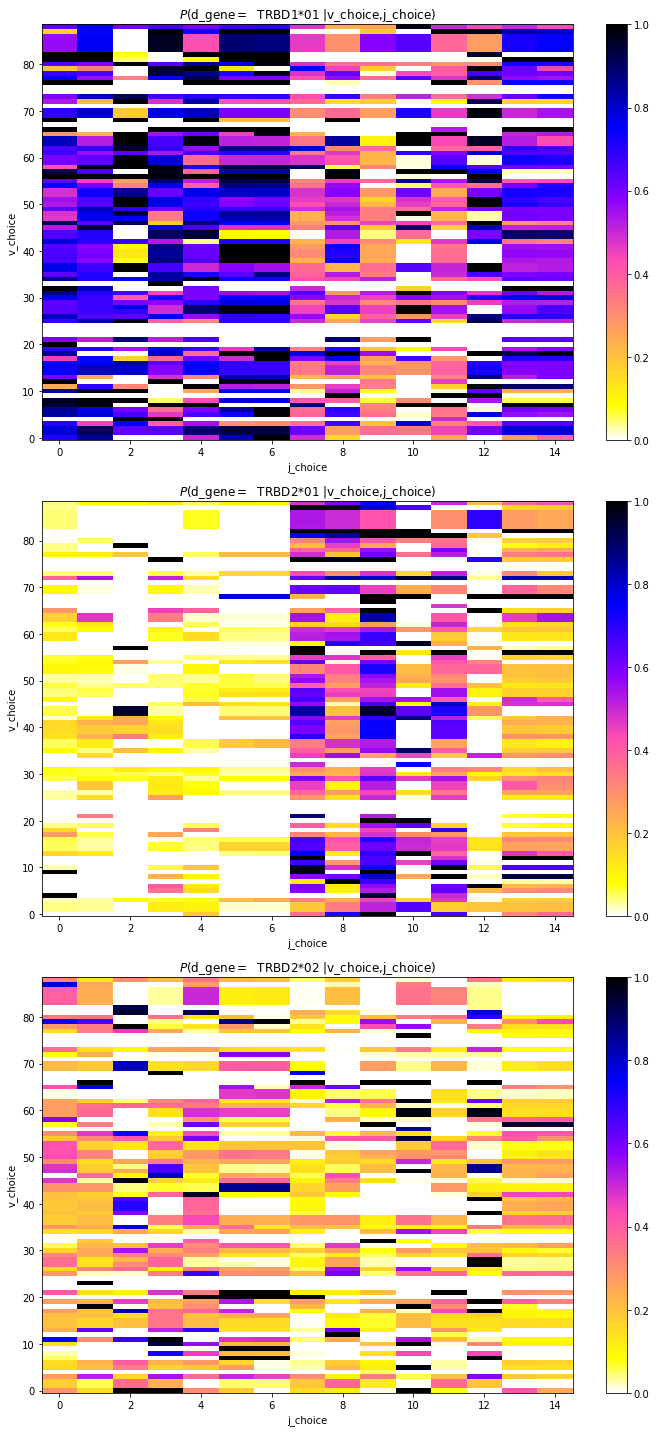

In [15]:
mdl_hb.plot_Event('d_gene')

## Marginal Probabilities

With IGoR provide us the conditional probabilities of the events defined in the Bayesian network. 

So we can calculate marginal probabilities, i.e.

$P(\text{j_choice}) = \sum_{\text{v_choice}}P(\text{j_choice}, \text{v_choice})$

and using the Bayes theorem

$ P(\text{j_choice}, \text{v_choice}) = P(\text{j_choice} | \text{v_choice}) \times P(\text{v_choice})$

we get,

$P(\text{j_choice}) = \sum_{\text{v_choice}} P(\text{j_choice} | \text{v_choice}) \times P(\text{v_choice})$

(<xarray.DataArray (j_choice: 15)>
 array([0.11962186, 0.10538077, 0.02016188, 0.05684014, 0.09945672,
        0.03726745, 0.0322361 , 0.12542452, 0.05034454, 0.09853381,
        0.01948227, 0.07500318, 0.0190534 , 0.0709002 , 0.07029376])
 Coordinates:
   * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
     lbl__j_choice  (j_choice) object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGI...
     seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...,
 [<matplotlib.lines.Line2D at 0x7fac1dacf7d0>])

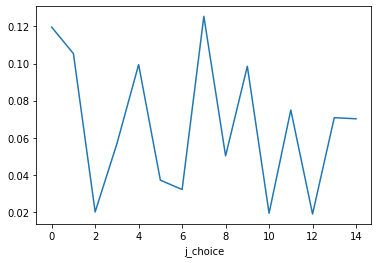

In [16]:
import xarray as xr
P_marginal_j_choice = xr.dot(mdl_hb['j_choice'], mdl_hb['v_choice'])
P_marginal_j_choice, P_marginal_j_choice.plot()

But when a model is loaded with pygor3 the marginals are calculated automatically using a variable elimination process
and are store in the Pmarginal variable

IgorModel.Pmarginal['event_nickname']

For this case

$ P(\text{'j_choice'}) = $ mdl_hb.Pmarginal['j_choice']

<xarray.DataArray (d_gene: 3)>
array([0.56140871, 0.2361217 , 0.20247255])
Coordinates:
  * d_gene       (d_gene) int64 0 1 2
    lbl__d_gene  (d_gene) object ' TRBD1*01' ' TRBD2*01' ' TRBD2*02'
    seq__d_gene  (d_gene) object 'GGGACAGGGGGC' ... 'GGGACTAGCGGGAGGG'

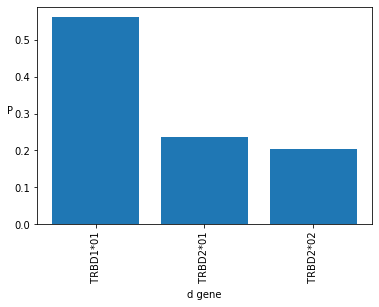

In [17]:
mdl_hb.plot_Event_Marginal('d_gene')
mdl_hb.Pmarginal['d_gene']

<AxesSubplot:xlabel='d 3 del', ylabel='P'>

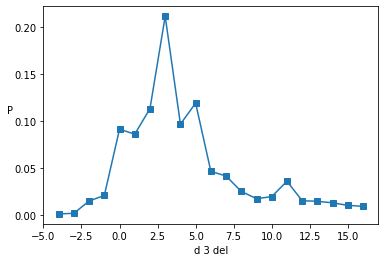

In [18]:
mdl_hb.plot_Event_Marginal('d_3_del')

If you modifiy the conditional probabilities, to re-calculate the marginals, use the method generate_Pmarginals()

In [19]:
mdl_hb.generate_Pmarginals()

## Joint Probabilities
Pygor3 also have a method to calculate the joint probabilities of events

IgorModel.get_P_joint(['event_nickname_1', 'event_nickname_2', ...])

> :WARNING: **Be carefull with this function a the computer memory consumption could increase if more than 2 events are requested**.

$P(\text{'v_choice'}, \text{'j_choice'}) = $mdl_hb.get_P_joint(['v_choice', 'j_choice'])

In [20]:
P_V_J = mdl_hb.get_P_joint(['v_choice', 'j_choice'])
P_V_J

<xarray.DataArray (v_choice: 89, j_choice: 15)>
array([[6.28453463e-04, 5.08306114e-04, 2.00831906e-04, ...,
        0.00000000e+00, 2.62143710e-04, 1.82391677e-04],
       [1.54890932e-03, 7.36213918e-04, 1.06011576e-04, ...,
        2.29432410e-04, 6.05154843e-04, 6.95679479e-04],
       [1.54900602e-03, 7.36581450e-04, 1.06039046e-04, ...,
        2.28733827e-04, 6.05348578e-04, 6.95983268e-04],
       ...,
       [4.05407259e-04, 1.55690174e-04, 0.00000000e+00, ...,
        1.15101267e-04, 1.80155267e-04, 1.96566942e-04],
       [3.00565952e-09, 1.68608515e-12, 0.00000000e+00, ...,
        2.81447867e-04, 5.64048061e-05, 6.77364474e-05],
       [1.65903669e-03, 1.77940202e-03, 6.30491475e-04, ...,
        3.45140763e-04, 1.12130116e-03, 9.08844648e-04]])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    seq__v_choice  (v_choice) object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACA...
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...

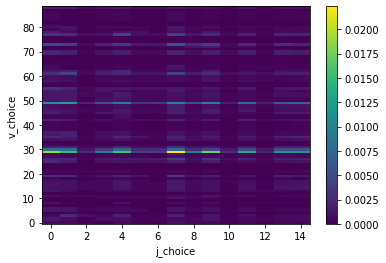

In [21]:
P_V_J.plot()

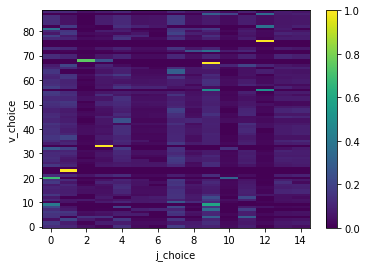

In [22]:
mdl_hb['j_choice'].plot()

## Editing a model

A model can be edited manually if necessary. In cases like a long gene description or to add new anchors to the existing genomic templates

In [23]:
mdl_hb.genomic_dataframe_dict

{'V':                                                  name  \
 id                                                      
 0   U66059|TRBV1*01|Homo sapiens|P|V-REGION|91723....   
 1   U66059|TRBV10-1*01|Homo sapiens|F|V-REGION|214...   
 2   AF009660|TRBV10-1*02|Homo sapiens|F|V-REGION|5...   
 3   AF009660|TRBV10-1*04|Homo sapiens|F|V-REGION|5...   
 4   U66059|TRBV10-2*01|Homo sapiens|F|V-REGION|239...   
 ..                                                ...   
 84  M14261|TRBV7-9*04|Homo sapiens|(F)|V-REGION|58...   
 85  M27385|TRBV7-9*05|Homo sapiens|(F)|V-REGION|34...   
 86  X74844|TRBV7-9*06|Homo sapiens|(F)|V-REGION|10...   
 87  L14854|TRBV7-9*07|Homo sapiens|(F)|V-REGION|1....   
 88  U66059|TRBV9*01|Homo sapiens|F|V-REGION|206836...   
 
                                                 value  anchor_index  
 id                                                                   
 0   GATACTGGAATTACCCAGACACCAAAATACCTGGTCACAGCAATGG...           NaN  
 1   GATGCTGAAATCACCCAGAGC

First we make a copy of genomic_dataframe_dict

In [24]:
import copy
genomic_dict = copy.deepcopy(mdl_hb.genomic_dataframe_dict)
genomic_dict['V']['name']

id
0     U66059|TRBV1*01|Homo sapiens|P|V-REGION|91723....
1     U66059|TRBV10-1*01|Homo sapiens|F|V-REGION|214...
2     AF009660|TRBV10-1*02|Homo sapiens|F|V-REGION|5...
3     AF009660|TRBV10-1*04|Homo sapiens|F|V-REGION|5...
4     U66059|TRBV10-2*01|Homo sapiens|F|V-REGION|239...
                            ...                        
84    M14261|TRBV7-9*04|Homo sapiens|(F)|V-REGION|58...
85    M27385|TRBV7-9*05|Homo sapiens|(F)|V-REGION|34...
86    X74844|TRBV7-9*06|Homo sapiens|(F)|V-REGION|10...
87    L14854|TRBV7-9*07|Homo sapiens|(F)|V-REGION|1....
88    U66059|TRBV9*01|Homo sapiens|F|V-REGION|206836...
Name: name, Length: 89, dtype: object

Then we change the long description names using v_genLabel function.

In [25]:
genomic_dict['V']['name'] = p3.v_genLabel(genomic_dict['V']['name'])
genomic_dict['J']['name'] = p3.v_genLabel(genomic_dict['J']['name'])

Finally, update the the genomic_dataframe_dict with this new dict, by using the set_genomic_dataframe_dict method.

In [26]:
mdl_hb.set_genomic_dataframe_dict(genomic_dict)

In [27]:
mdl_hb.parms['v_choice']

,value,name
id,,
0,GATACTGGAATTACCCAGACACCAAAATACCTGGTCACAGCAATGG...,TRBV1*01
1,GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...,TRBV10-1*01
2,GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...,TRBV10-1*02
3,GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...,TRBV10-1*04
4,GATGCTGGAATCACCCAGAGCCCAAGATACAAGATCACAGAGACAG...,TRBV10-2*01
...,...,...
84,ATATCTGGAGTCTCCCACAACCCCAGACACAAGATCACAAAGAGGG...,TRBV7-9*04
85,GATACTGGAGTCTCCCAGAACCCCAGACACAAGATCACAAAGAGGG...,TRBV7-9*05
86,GATACTGGAGTCTCCCAGAACCCCAGACACAAGATCACAAAGAGGG...,TRBV7-9*06


In [28]:
mdl_hb['v_choice']

<xarray.DataArray (v_choice: 89)>
array([4.88741e-03, 9.32369e-03, 9.32259e-03, 1.30320e-02, 3.43430e-04,
       8.50694e-03, 7.71250e-03, 6.12276e-04, 5.06104e-03, 4.59289e-05,
       4.48245e-03, 8.16181e-03, 7.00053e-04, 7.77164e-03, 1.16174e-02,
       1.16158e-02, 1.13872e-02, 1.06555e-02, 2.36870e-03, 2.28368e-02,
       1.56715e-04, 4.58447e-03, 0.00000e+00, 4.88782e-05, 0.00000e+00,
       1.54500e-02, 2.74050e-02, 5.18979e-03, 4.80289e-03, 1.62765e-01,
       6.61229e-02, 2.07174e-02, 7.36226e-04, 2.47846e-37, 1.07472e-02,
       2.03820e-02, 9.53245e-03, 9.53006e-03, 2.35607e-03, 2.39208e-03,
       2.39208e-03, 2.45219e-03, 1.66904e-02, 2.98807e-03, 2.98804e-03,
       1.59156e-02, 1.25468e-02, 9.06711e-03, 9.06936e-03, 9.76534e-02,
       9.57746e-03, 9.17011e-03, 1.14472e-02, 1.14458e-02, 9.77554e-03,
       1.89924e-02, 3.97949e-04, 1.70242e-03, 8.91336e-03, 6.73926e-03,
       6.69167e-03, 2.94257e-02, 1.38534e-02, 4.19227e-03, 4.19275e-03,
       2.48630e-03, 4.83399e-04, 1.29795e-07, 6.49975e-05, 1.94736e-02,
       1.94728e-02, 0.00000e+00, 3.91595e-03, 3.96230e-02, 0.00000e+00,
       0.00000e+00, 6.73805e-05, 2.90073e-02, 9.28490e-03, 5.32118e-03,
       8.18432e-03, 1.07035e-03, 3.64764e-04, 3.26790e-03, 3.26801e-03,
       3.26801e-03, 3.26809e-03, 8.23600e-04, 1.56399e-02])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    lbl__v_choice  (v_choice) object 'TRBV1*01' 'TRBV10-1*01' ... 'TRBV9*01'
    seq__v_choice  (v_choice) object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACA...
Attributes:
    nickname:    v_choice
    event_type:  GeneChoice
    seq_type:    V_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     []
    childs:      ['v_3_del', 'd_gene', 'j_choice']

In [29]:
mdl_hb.ErrorRate_dict

{'error_type': 'SingleErrorRate', 'error_values': '0.000396072'}

## New models

Pygor has a methods to create default VDJ and VJ models from a dataframes.

In [30]:
new_V_gene_dict = {
    'name':'my_pseudo_TRBV',
    'value':'AAACCCTTTGGGACCCAGAGCCCAAGACACAAGATCACAGAGACAGGAAGGCAGGTGACCTTGGCGTGTCACCAGACTTGGAACCACAACAATATGTTCTGGTATCGACAAGACCTGGGACATGGGCTGAGGCTGATCCATTACTCATATGGTGTTCACGACACTAACAAAGGAGAAGTCTCAGATGGCTACAGTGTCTCTAGATCAAACACAGAGGACCTCCCCCTCACTCTGTAGTCTGCTGCCTCCTCCCAGACATCTGTATATTTCTGCGCCAGCAGTGAGTC',
    'anchor_index': 270
}

In [31]:
df_V = genomic_dict['V'].loc[10:15]
df_V = df_V.append(new_V_gene_dict, ignore_index=True)
df_V.index.name='id'
df_V

,name,value,anchor_index
id,,,
0,TRBV11-2*03,GAAGCTGGAGTTGCCCAGTCTCCCAGATATAAGATTATAGAGAAAA...,273.0
1,TRBV11-3*01,GAAGCTGGAGTGGTTCAGTCTCCCAGATATAAGATTATAGAGAAAA...,273.0
2,TRBV12-1*01,GCTGGTGTTATCCAGTCACCCAGGCACAAAGTGACAGAGATGGGAC...,270.0
3,TRBV12-2*01,GCTGGCATTATCCAGTCACCCAAGCATGAGGTGACAGAAATGGGAC...,270.0
4,TRBV12-3*01,GATGCTGGAGTTATCCAGTCACCCCGCCATGAGGTGACAGAGATGG...,273.0
5,TRBV12-4*01,GATGCTGGAGTTATCCAGTCACCCCGGCACGAGGTGACAGAGATGG...,273.0
6,my_pseudo_TRBV,AAACCCTTTGGGACCCAGAGCCCAAGACACAAGATCACAGAGACAG...,270.0


Now we can use this new genomic templates to create a new model

In [32]:
new_mdl_0 = p3.IgorModel.make_default_VDJ(df_V, genomic_dict['D'], genomic_dict['J'])
new_mdl_0

(<Figure size 1296x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'$P($v_choice$)$'}>)

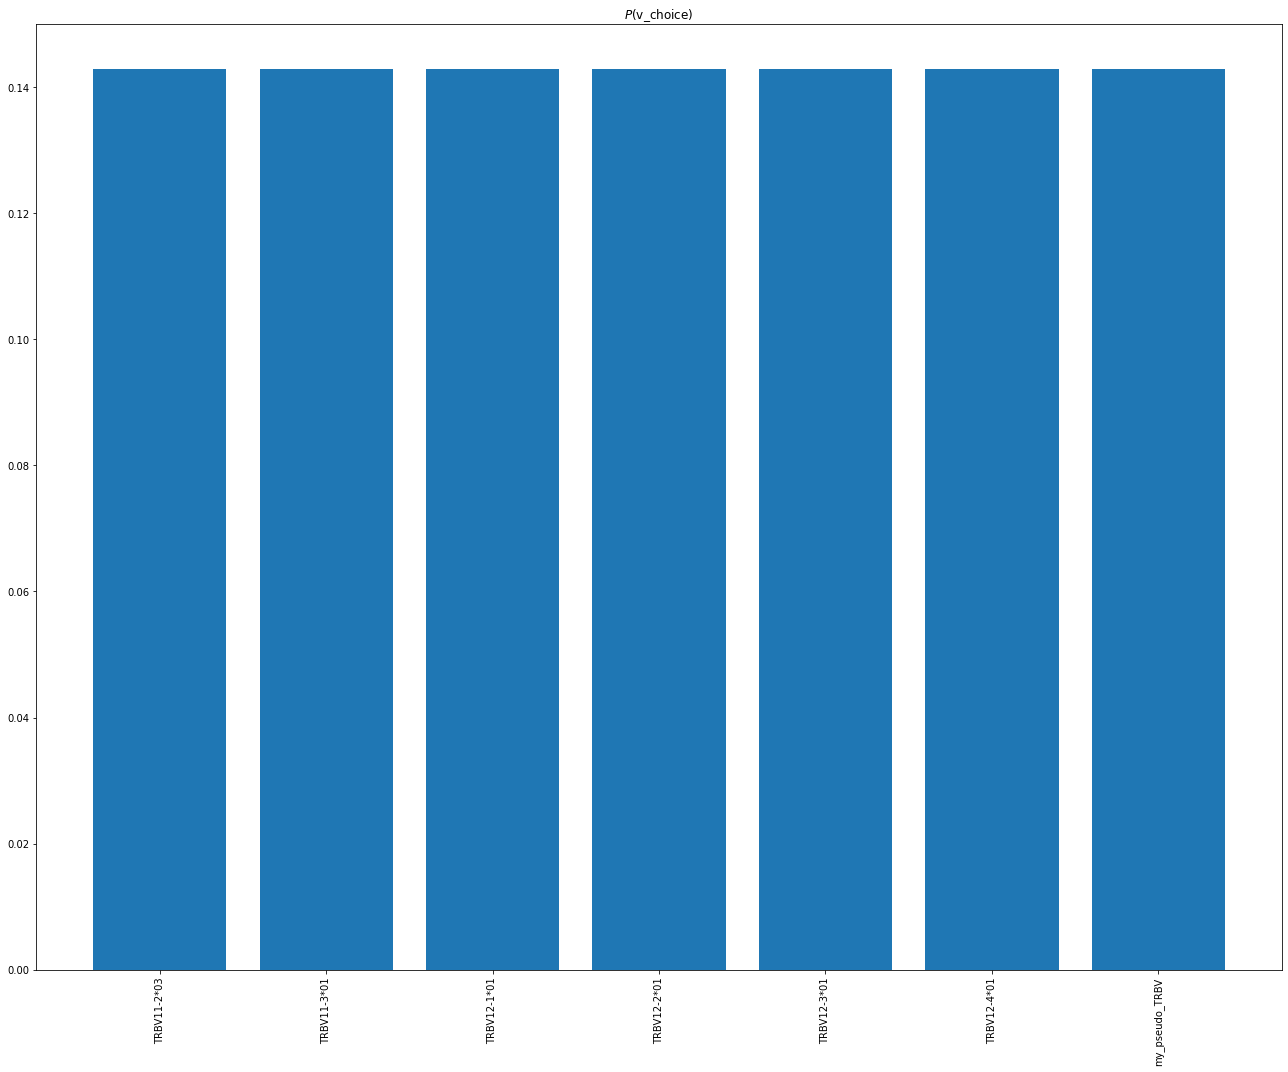

In [33]:
new_mdl_0.plot_Event('v_choice')

By default the new model will initiate with a uniform probability, that can be used to infer a new model from data

### Exporting a Model

Conditional and marginal probabilities can be exported as pdf files with plots

In [34]:
fln_output_prefix = "mdl_hb"
mdl_hb.export_plot_Pconditionals(fln_output_prefix+"_CP")

In [35]:
mdl_hb.export_plot_Pmarginals(fln_output_prefix+"_MP")

A model can be exported in IGoR's format with write_model method

In [36]:
new_mdl_0.write_model('new_model_parms.txt', 'new_model_marginals.txt',
                      fln_V_gene_CDR3_anchors='new_V_anchors.csv', 
                      fln_J_gene_CDR3_anchors='new_J_anchors.csv')

Writing model parms in file  new_model_parms.txt
Writing model marginals in file  new_model_marginals.txt
Writing gene anchor's in file  new_V_anchors.csv
Writing gene anchor's in file  new_J_anchors.csv


In [37]:
!head new_model_parms.txt

@Event_list
#GeneChoice;V_gene;Undefined_side;7;v_choice
%TRBV11-2*03;GAAGCTGGAGTTGCCCAGTCTCCCAGATATAAGATTATAGAGAAAAGGCAGAGTGTGGCTTTTTGGTGCAATCCTATATCTGGCCATGCTACCCTTTACTGGTACCAGCAGATCCTGGGACAGGGCCCAAAGCTTCTGATTCAGTTTCAGAATAACGGTGTAGTGGATGATTCACAGTTGCCTAAGGATCGATTTTCTGCAGAGAGGCTCAAAGGAGTAGACTCCACTCTCAAGATCCAACCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCAGCTTAGA;0
%TRBV11-3*01;GAAGCTGGAGTGGTTCAGTCTCCCAGATATAAGATTATAGAGAAAAAACAGCCTGTGGCTTTTTGGTGCAATCCTATTTCTGGCCACAATACCCTTTACTGGTACCTGCAGAACTTGGGACAGGGCCCGGAGCTTCTGATTCGATATGAGAATGAGGAAGCAGTAGACGATTCACAGTTGCCTAAGGATCGATTTTCTGCAGAGAGGCTCAAAGGAGTAGACTCCACTCTCAAGATCCAGCCTGCAGAGCTTGGGGACTCGGCCGTGTATCTCTGTGCCAGCAGCTTAGA;1
%TRBV12-1*01;GCTGGTGTTATCCAGTCACCCAGGCACAAAGTGACAGAGATGGGACAATCAGTAACTCTGAGATGCGAACCAATTTCAGGCCACAATGATCTTCTCTGGTACAGACAGACCTTTGTGCAGGGACTGGAATTGCTGAATTACTTCTGCAGCTGGACCCTCGTAGATGACTCAGGAGTGTCCAAGGATTGATTCTCAGCACAGATGCCTGATGTATCATTCTCCACTCTGAGGATCCAGCCCATGGAACCCAGGGACTTGGGCCTATATTTCTGTGCCAGCAGCTTTGC;2
%TRBV12-2*01;GCTGGCATTATCCAG

In [38]:
!head new_V_anchors.csv

gene;anchor_index
TRBV11-2*03;273
TRBV11-3*01;273
TRBV12-1*01;270
TRBV12-2*01;270
TRBV12-3*01;273
TRBV12-4*01;273
my_pseudo_TRBV;270


In [39]:
mdl_0 = p3.IgorModel('new_model_parms.txt', 'new_model_marginals.txt',
                      fln_V_gene_CDR3_anchors='new_V_anchors.csv', 
                      fln_J_gene_CDR3_anchors='new_J_anchors.csv')
mdl_0['v_choice']

Reading Parms filename from:  new_model_parms.txt
Reading Marginals filename from:  new_model_marginals.txt


<xarray.DataArray (v_choice: 7)>
array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6
    lbl__v_choice  (v_choice) object 'TRBV11-2*03' ... 'my_pseudo_TRBV'
    seq__v_choice  (v_choice) object 'GAAGCTGGAGTTGCCCAGTCTCCCAGATATAAGATTATA...
Attributes:
    nickname:    v_choice
    event_type:  GeneChoice
    seq_type:    V_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     []
    childs:      ['j_choice', 'd_gene', 'v_3_del']

IgorModel can also be exported in separated csv files

In [40]:
mdl_0.export_csv('initial_')

In [41]:
!head initial_P__insertions.csv

Insertions;P(vd_ins);P(dj_ins)
0;0.024390243902439025;0.024390243902439025
1;0.024390243902439025;0.024390243902439025
2;0.024390243902439025;0.024390243902439025
3;0.024390243902439025;0.024390243902439025
4;0.024390243902439025;0.024390243902439025
5;0.024390243902439025;0.024390243902439025
6;0.024390243902439025;0.024390243902439025
7;0.024390243902439025;0.024390243902439025
8;0.024390243902439025;0.024390243902439025


In [42]:
!head initial_P__j_choice__G__v_choice.csv

;TRBJ1-1*01;TRBJ1-2*01;TRBJ1-3*01;TRBJ1-4*01;TRBJ1-5*01;TRBJ1-6*01;TRBJ1-6*02;TRBJ2-1*01;TRBJ2-2*01;TRBJ2-3*01;TRBJ2-4*01;TRBJ2-5*01;TRBJ2-6*01;TRBJ2-7*01;TRBJ2-7*02
TRBV11-2*03;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667
TRBV11-3*01;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667
TRBV12-1*01;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.06666666666666667;0.0666666666666666

## Entropy


$ H = - \sum_x P_(x) \log(P(x)) $ 

In [43]:
import numpy as np
-np.dot(mdl_hb['v_choice'], np.nan_to_num(np.log2(mdl_hb['v_choice']), neginf=0, nan=0) )

/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)


5.252905287497762

In [44]:
mdl_hb.get_entropy_event('v_choice')

<xarray.DataArray ()>
array(5.25291424)

### Mutual Information

In [45]:
I_V_J = mdl_hb.get_mutual_information_events('v_choice', 'j_choice')
I_V_J

/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)


<xarray.DataArray ()>
array(0.0779008)

In [46]:
da_mi = mdl_hb.get_mutual_information()
da_mi

/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev

<xarray.DataArray 'mutual_information' (x: 9, y: 9)>
array([[0.00000000e+00, 2.74757454e-02, 7.79007955e-02, 3.34244341e-01,
        2.42224927e-03, 3.84618632e-03, 3.11240332e-03, 0.00000000e+00,
        0.00000000e+00],
       [2.74757454e-02, 0.00000000e+00, 1.54509182e-01, 7.40373019e-04,
        1.50139212e-01, 2.66774661e-01, 4.92915719e-03, 0.00000000e+00,
        0.00000000e+00],
       [7.79007955e-02, 1.54509182e-01, 0.00000000e+00, 7.48363481e-04,
        9.41603438e-03, 8.72144895e-03, 3.15006638e-01, 0.00000000e+00,
        0.00000000e+00],
       [3.34244341e-01, 7.40373019e-04, 7.48363481e-04, 0.00000000e+00,
        5.45436417e-05, 7.33990325e-05, 2.35845118e-05, 0.00000000e+00,
        0.00000000e+00],
       [2.42224927e-03, 1.50139212e-01, 9.41603438e-03, 5.45436417e-05,
        0.00000000e+00, 4.49012987e-01, 2.87003080e-04, 0.00000000e+00,
        0.00000000e+00],
       [3.84618632e-03, 2.66774661e-01, 8.72144895e-03, 7.33990325e-05,
        4.49012987e-01, 0.00000000e+00, 2.74201841e-04, 0.00000000e+00,
        0.00000000e+00],
       [3.11240332e-03, 4.92915719e-03, 3.15006638e-01, 2.35845118e-05,
        2.87003080e-04, 2.74201841e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])
Coordinates:
  * x        (x) <U8 'v_choice' 'd_gene' 'j_choice' ... 'vd_ins' 'dj_ins'
  * y        (y) <U8 'v_choice' 'd_gene' 'j_choice' ... 'vd_ins' 'dj_ins'

<AxesSubplot:>

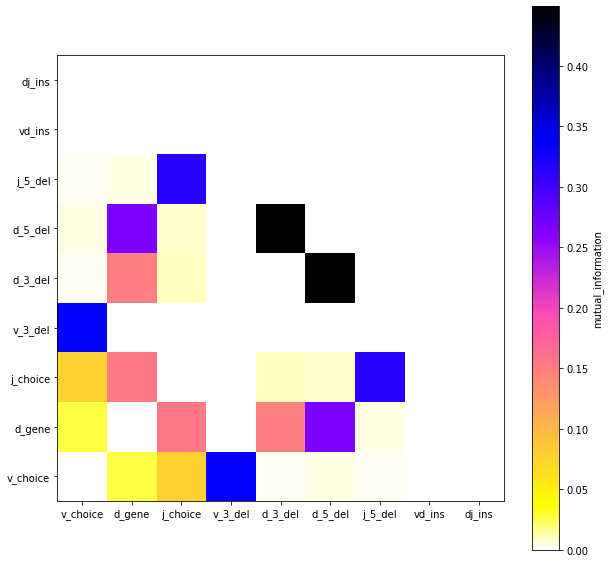

In [47]:
mdl_hb.plot_mutual_information(da_mi)

In [48]:
event_nickname1 = 'v_choice'
event_nickname2 = 'j_choice'

mdl = p3.get_default_IgorModel("human", "tcr_beta")

da_P_x_y = mdl.get_P_joint([event_nickname1, event_nickname2])
da_P_x = mdl.Pmarginal[event_nickname1]
da_P_y = mdl.Pmarginal[event_nickname2]

da_P_x_times_P_y = (da_P_x*da_P_y)
da_P_x_times_P_y

da_log_P_ratio = xr.zeros_like(da_P_x_y)

da_log_P_ratio.values = np.nan_to_num(
    np.log2(da_P_x_y / da_P_x_times_P_y), nan=0.0, neginf=0.0
)

# da_log_Value.values = np_log_Value
xr.dot( da_P_x_y, da_log_P_ratio )

Reading Parms filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Reading Marginals filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt


/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)


<xarray.DataArray ()>
array(0.0779008)

In [49]:
da_mi = mdl_hb.get_mutual_information()

/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev

<AxesSubplot:>

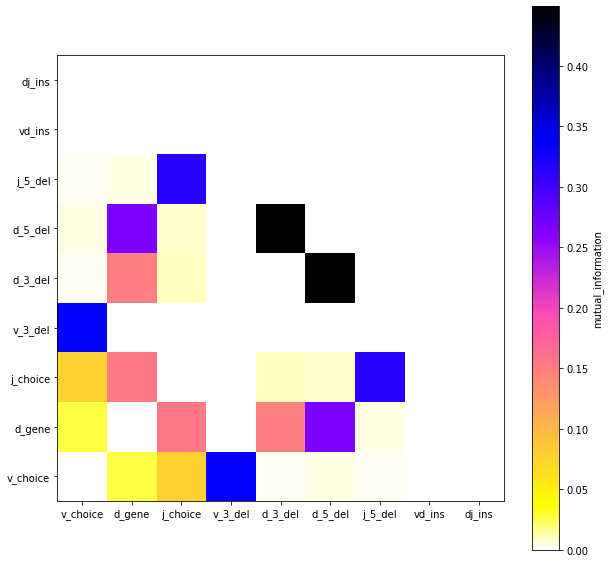

In [50]:
mdl_hb.plot_mutual_information(da_mi)

In [51]:
da_mi = mdl_hb.get_mutual_information()

/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev

<AxesSubplot:>

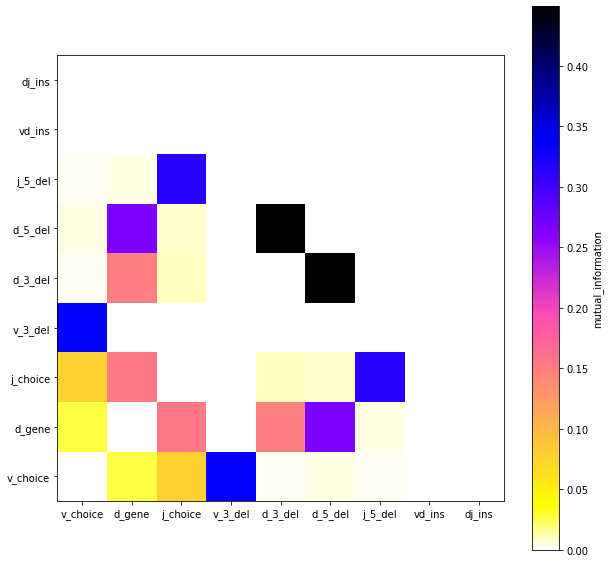

In [52]:
mdl_hb.plot_mutual_information(da_mi)

As can be seen in the Bayesian network, the number of deletions in V depends on choosen V

### Select events by probability

Here we can see which combinations of V and D are not possible, for our model

In [53]:
Pjoint_V_D = mdl_hb.get_P_joint(['v_choice', 'd_gene'])

da_tmp = Pjoint_V_D.where(Pjoint_V_D == 0)

df = da_tmp.to_dataframe('P_joint_V_D').dropna()
df #.to_csv('bibibi.csv', sep=';')

lbl__v_choice  \
v_choice d_gene                 
22       0          TRBV15*03   
         1          TRBV15*03   
         2          TRBV15*03   
24       0          TRBV17*01   
         1          TRBV17*01   
         2          TRBV17*01   
33       1          TRBV26*01   
         2          TRBV26*01   
67       0         TRBV6-9*01   
         2         TRBV6-9*01   
71       0         TRBV7-2*03   
         1         TRBV7-2*03   
         2         TRBV7-2*03   
74       0         TRBV7-3*02   
         1         TRBV7-3*02   
         2         TRBV7-3*02   
75       0         TRBV7-3*03   
         1         TRBV7-3*03   
         2         TRBV7-3*03   

                                                     seq__v_choice  \
v_choice d_gene                                                      
22       0       GATGCCATGGTCATCCAGAACCCAAGATACCGGGTTACCCAGTTTG...   
         1       GATGCCATGGTCATCCAGAACCCAAGATACCGGGTTACCCAGTTTG...   
         2       GATGCCATGGTCATCCAGAACCCAAGATACCGGGTTACCCAGTTTG...   
24       0       GAGCCTGGAGTCAGCCAGACCCCCAGACACAAGGTCACCAACATGG...   
         1       GAGCCTGGAGTCAGCCAGACCCCCAGACACAAGGTCACCAACATGG...   
         2       GAGCCTGGAGTCAGCCAGACCCCCAGACACAAGGTCACCAACATGG...   
33       1       GATGCTGTAGTTACACAATTCCCAAGACACAGAATCATTGGGACAG...   
         2       GATGCTGTAGTTACACAATTCCCAAGACACAGAATCATTGGGACAG...   
67       0       AATGCTGGTGTCACTCAGACCCCAAAATTCCACATCCTGAAGACAG...   
         2       AATGCTGGTGTCACTCAGACCCCAAAATTCCACATCCTGAAGACAG...   
71       0       GCTGGAGTCTCCCAGTCCCCCAGTAACAAGGTCACAGAGAAGGGAA...   
         1       GCTGGAGTCTCCCAGTCCCCCAGTAACAAGGTCACAGAGAAGGGAA...   
         2       GCTGGAGTCTCCCAGTCCCCCAGTAACAAGGTCACAGAGAAGGGAA...   
74       0       GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...   
         1       GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...   
         2       GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...   
75       0       GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...   
         1       GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...   
         2       GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...   

                lbl__d_gene       seq__d_gene  P_joint_V_D  
v_choice d_gene                                             
22       0         TRBD1*01      GGGACAGGGGGC          0.0  
         1         TRBD2*01  GGGACTAGCGGGGGGG          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0  
24       0         TRBD1*01      GGGACAGGGGGC          0.0  
         1         TRBD2*01  GGGACTAGCGGGGGGG          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0  
33       1         TRBD2*01  GGGACTAGCGGGGGGG          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0  
67       0         TRBD1*01      GGGACAGGGGGC          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0  
71       0         TRBD1*01      GGGACAGGGGGC          0.0  
         1         TRBD2*01  GGGACTAGCGGGGGGG          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0  
74       0         TRBD1*01      GGGACAGGGGGC          0.0  
         1         TRBD2*01  GGGACTAGCGGGGGGG          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0  
75       0         TRBD1*01      GGGACAGGGGGC          0.0  
         1         TRBD2*01  GGGACTAGCGGGGGGG          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0

In [54]:
mdl_hb['v_choice'].loc[22] #, mdl_hb['v_choice'].loc[67] 

<xarray.DataArray ()>
array(0.)
Coordinates:
    v_choice       int64 22
    lbl__v_choice  object 'TRBV15*03'
    seq__v_choice  object 'GATGCCATGGTCATCCAGAACCCAAGATACCGGGTTACCCAGTTTGGAAA...
Attributes:
    nickname:    v_choice
    event_type:  GeneChoice
    seq_type:    V_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     []
    childs:      ['v_3_del', 'd_gene', 'j_choice']

In [55]:
mdl_hb.genomic_dataframe_dict['V'].loc[22]

name                                                    TRBV15*03
value           GATGCCATGGTCATCCAGAACCCAAGATACCGGGTTACCCAGTTTG...
anchor_index                                                270.0
Name: 22, dtype: object

## Use a default IGoR's model to generate sequences

In [56]:
df_seqs = p3.generate(10, mdl_hb)
df_seqs

Writing model parms in file  ./igor_generating_3z_y24jv/dataIGoRBTnea5JaoG_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_generating_3z_y24jv/dataIGoRBTnea5JaoG_mdldata/models/model_marginals.txt
Writing gene anchor's in file  ./igor_generating_3z_y24jv/dataIGoRBTnea5JaoG_mdldata/ref_genome/V_gene_CDR3_anchors.csv
Writing gene anchor's in file  ./igor_generating_3z_y24jv/dataIGoRBTnea5JaoG_mdldata/ref_genome/J_gene_CDR3_anchors.csv
Writing model parms in file  ./igor_generating_3z_y24jv/dataIGoRBTnea5JaoG_mdldata//models/model_parms.txt
Writing model marginals in file  ./igor_generating_3z_y24jv/dataIGoRBTnea5JaoG_mdldata//models/model_marginals.txt
Writing gene anchor's in file  ./igor_generating_3z_y24jv/dataIGoRBTnea5JaoG_mdldata//ref_genome/V_gene_CDR3_anchors.csv
Writing gene anchor's in file  ./igor_generating_3z_y24jv/dataIGoRBTnea5JaoG_mdldata//ref_genome/J_gene_CDR3_anchors.csv
/home/olivares/.local/bin/igor -set_wd ./igor_generating_3z_y24jv -batch dat

,nt_sequence
seq_index,
0,AAGGCTGGAGTCACTCAAACTCCAAGATATCTGATCAAAACGAGAG...
1,GAAGCTGGAGTTACTCAGTTCCCCAGCCACAGCGTAATAGAGAAGG...
2,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...
3,GGAGCTGGAGTCTCCCAGTCCCCCAGTAACAAGGTCACAGAGAAGG...
4,GAAGCTGGAGTTGCCCAGTCTCCCAGATATAAGATTATAGAGAAAA...
5,GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...
6,GATGCTGATGTTACCCAGACCCCAAGGAATAGGATCACAAAGACAG...
7,AAGGCTGGAGTCACTCAAACTCCAAGATATCTGATCAAAACGAGAG...
8,GAAACGGGAGTTACGCAGACACCAAGACACCTGGTCATGGGAATGA...


## One sequence evaluation
Let's consider that we have a sequence of a TCR $\beta$ receptor

In [57]:
str_seq_hb = "ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGTATCGTCAGTTCCCGAAACAGAGTCTCATGCTGATGGCAACTTCCAATGAGGGCTCCAAGGCCACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATGCAAGCCTGACCTTGTCCACTCTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTTGGAG"

A classical approach would be make alignments of the VDJ segments and consider the maximun alignment of the segments as uniquely determinated construction.

In [58]:
## TODO: SHOW NAIVE ALIGNMENT

In [59]:
## TODO: Simple explantion of the inference process 

# Evaluate VDJ model

In [60]:
mdl = p3.get_default_IgorModel("human", "tcr_beta")

Reading Parms filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Reading Marginals filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt


In [61]:
help(p3.evaluate)

Help on function evaluate in module pygor3.IgorIO:

evaluate(input_sequences: Union[str, pandas.core.frame.DataFrame, numpy.ndarray, pathlib.Path], mdl: pygor3.IgorIO.IgorModel, N_scenarios=None, igor_wd=None, airr_format=True, batch_clean=True)
    Evaluate input sequences with provided model
    :param input_sequences:Union[str, pd.DataFrame, np.ndarray, Path]
    :param mdl:IgorModel
    :param batch_clean: Remove all temporary files True by default.



### Evaluation AIRR format

In [62]:
df_scenarios = p3.evaluate(str_seq_hb, mdl) # , N_scenarios=20
df_scenarios

Writing model parms in file  ./igor_evaluating_1b6e6i7z/dataIGoRyNbbuLilFX_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_evaluating_1b6e6i7z/dataIGoRyNbbuLilFX_mdldata/models/model_marginals.txt
Writing gene anchor's in file  ./igor_evaluating_1b6e6i7z/dataIGoRyNbbuLilFX_mdldata/ref_genome/V_gene_CDR3_anchors.csv
Writing gene anchor's in file  ./igor_evaluating_1b6e6i7z/dataIGoRyNbbuLilFX_mdldata/ref_genome/J_gene_CDR3_anchors.csv
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_1b6e6i7z -batch dataIGoRyNbbuLilFX -read_seqs ./igor_evaluating_1b6e6i7z/dataIGoRyNbbuLilFXinput_sequences.csv
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_1b6e6i7z -batch dataIGoRyNbbuLilFX -set_genomic  --V ./igor_evaluating_1b6e6i7z/dataIGoRyNbbuLilFX_mdldata/ref_genome/genomicVs.fasta --D ./igor_evaluating_1b6e6i7z/dataIGoRyNbbuLilFX_mdldata/ref_genome/genomicDs.fasta --J ./igor_evaluating_1b6e6i7z/dataIGoRyNbbuLilFX_mdldata/ref_genome/genomicJs.fasta -set_CDR3_a

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,junction_aa,v_cigar,d_cigar,j_cigar,v_score,v_identity,v_support,v_sequence_start,v_sequence_end,v_germline_start,v_germline_end,v_alignment_start,v_alignment_end,d_score,d_identity,d_support,d_sequence_start,d_sequence_end,d_germline_start,d_germline_end,d_alignment_start,d_alignment_end,j_score,j_identity,j_support,j_sequence_start,j_sequence_end,j_germline_start,j_germline_end,j_alignment_start,j_alignment_end,sequence_aa,vj_in_frame,stop_codon,complete_vdj,locus,sequence_alignment_aa,n1_length,np1,np1_aa,np1_length,n2_length,np2,np2_aa,np2_length,p3v_length,p5d_length,p3d_length,p5j_length,scenario_rank,scenario_proba_cond_seq,pgen,quality,quality_alignment
0,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD1*01,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,288M,4M,48M,1440,NaN,NaN,2,288,61,286,NaN,NaN,20,NaN,NaN,292,294,7,10,NaN,NaN,240,NaN,NaN,7,53,4,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,GGGGA,NaN,5,4,CAGC,NaN,4,0,0,0,0,1,0.146984,4.871310e-13,NaN,NaN
1,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD2*02,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,288M,4M,48M,1440,NaN,NaN,2,288,61,286,NaN,NaN,20,NaN,NaN,292,294,14,17,NaN,NaN,240,NaN,NaN,7,53,4,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,GGGGA,NaN,5,4,CAGC,NaN,4,0,0,0,0,2,0.112527,4.871310e-13,NaN,NaN
2,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD1*01,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,288M,3M,48M,1440,NaN,NaN,2,288,61,286,NaN,NaN,15,NaN,NaN,296,297,6,8,NaN,NaN,240,NaN,NaN,3,49,4,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,GGGGAAGGG,NaN,9,1,C,NaN,1,0,0,0,0,3,0.062955,4.871310e-13,NaN,NaN
3,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD2*02,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,288M,3M,48M,1440,NaN,NaN,2,288,61,286,NaN,NaN,15,NaN,NaN,293,294,15,17,NaN,NaN,240,NaN,NaN,6,52,4,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,GGGGAA,NaN,6,3,AGC,NaN,4,0,0,1,0,4,0.060409,4.871310e-13,NaN,NaN
4,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD1*01,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,288M,4M,48M,1440,NaN,NaN,2,288,61,286,NaN,NaN,20,NaN,NaN,293,295,10,13,NaN,NaN,240,NaN,NaN,6,52,4,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,GGGGAA,NaN,6,3,AGC,NaN,3,0,0,0,0,5,0.034684,4.871310e-13,NaN,NaN
5,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD1*01,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,287M,4M,48M,1435,NaN,NaN,2,287,61,285,NaN,NaN,20,NaN,NaN,292,294,7,10,NaN,NaN,240,NaN,NaN,7,53,4,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,TGGGGA,NaN,6,4,CAGC,NaN,4,0,0,0,0,6,0.028806,4.871310e-13,NaN,NaN
6,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD2*02,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,288M,3M,48M,1440,NaN,NaN,2,288,61,286,NaN,NaN,15,NaN,Na

### Evaluation IGoR format

In [63]:
df_scenarios = p3.evaluate(str_seq_hb, mdl_hb, airr_format=False) # , N_scenarios=20
df_scenarios

Writing model parms in file  ./igor_evaluating_mdsvldqo/dataIGoRQVzl4XnKII_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_evaluating_mdsvldqo/dataIGoRQVzl4XnKII_mdldata/models/model_marginals.txt
Writing gene anchor's in file  ./igor_evaluating_mdsvldqo/dataIGoRQVzl4XnKII_mdldata/ref_genome/V_gene_CDR3_anchors.csv
Writing gene anchor's in file  ./igor_evaluating_mdsvldqo/dataIGoRQVzl4XnKII_mdldata/ref_genome/J_gene_CDR3_anchors.csv
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_mdsvldqo -batch dataIGoRQVzl4XnKII -read_seqs ./igor_evaluating_mdsvldqo/dataIGoRQVzl4XnKIIinput_sequences.csv
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_mdsvldqo -batch dataIGoRQVzl4XnKII -set_genomic  --V ./igor_evaluating_mdsvldqo/dataIGoRQVzl4XnKII_mdldata/ref_genome/genomicVs.fasta --D ./igor_evaluating_mdsvldqo/dataIGoRQVzl4XnKII_mdldata/ref_genome/genomicDs.fasta --J ./igor_evaluating_mdsvldqo/dataIGoRQVzl4XnKII_mdldata/ref_genome/genomicJs.fasta -set_CDR3_a

,scenario_rank,scenario_proba_cond_seq,v_choice,j_choice,d_gene,v_3_del,d_5_del,j_5_del,d_3_del,vd_ins,vd_dinucl,dj_ins,dj_dinucl,Mismatches,Pgen_estimate
seq_index,,,,,,,,,,,,,,,
0,1,0.146984,29,2,0,9,9,6,7,5,"[2, 2, 2, 2, 0]",4,"[1, 2, 0, 1]",[],4.871310e-13
0,2,0.112527,29,2,2,9,16,6,4,5,"[2, 2, 2, 2, 0]",4,"[1, 2, 0, 1]",[],4.871310e-13
0,3,0.062955,29,2,0,9,8,6,9,9,"[2, 2, 2, 2, 0, 0, 2, 2, 2]",1,[1],[],4.871310e-13
0,4,0.060409,29,2,2,9,17,6,3,6,"[2, 2, 2, 2, 0, 0]",3,"[1, 2, 0]",[],4.871310e-13
0,5,0.034684,29,2,0,9,12,6,4,6,"[2, 2, 2, 2, 0, 0]",3,"[1, 2, 0]",[],4.871310e-13
0,6,0.028806,29,2,0,10,9,6,7,6,"[3, 2, 2, 2, 2, 0]",4,"[1, 2, 0, 1]",[],4.871310e-13
0,7,0.023637,29,2,2,9,13,6,8,6,"[2, 2, 2, 2, 0, 0]",4,"[1, 2, 0, 1]",[],4.871310e-13
0,8,0.022053,29,2,2,10,16,6,4,6,"[3, 2, 2, 2, 2, 0]",4,"[1, 2, 0, 1]",[],4.871310e-13
0,9,0.017562,29,2,2,9,13,6,7,1,[2],8,"[1, 2, 0, 1, 2, 2, 2, 0]",[],4.871310e-13


## Visualize scenarios

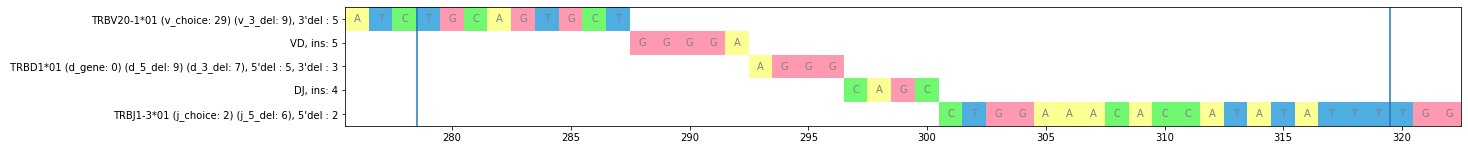

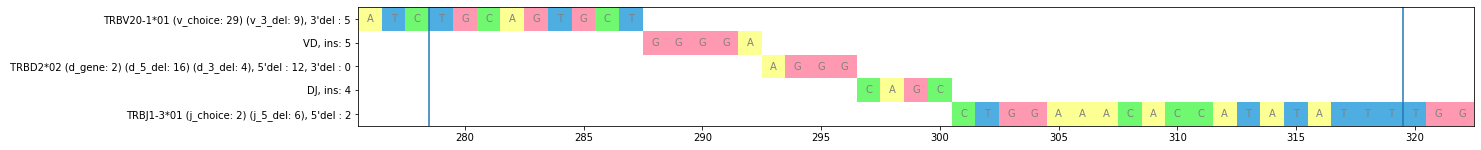

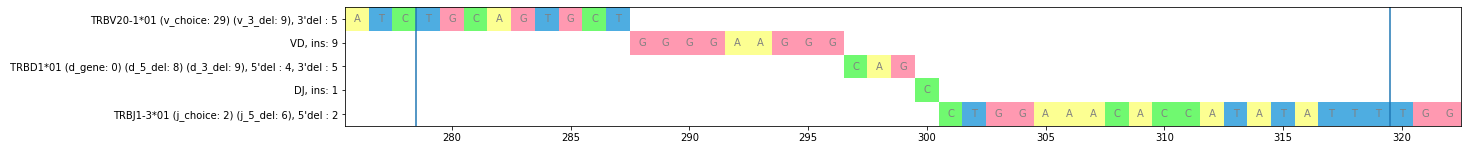

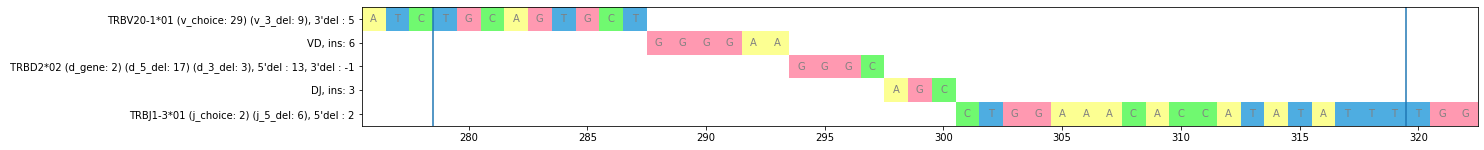

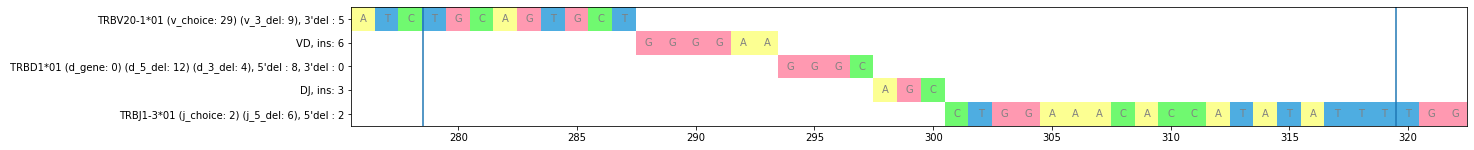

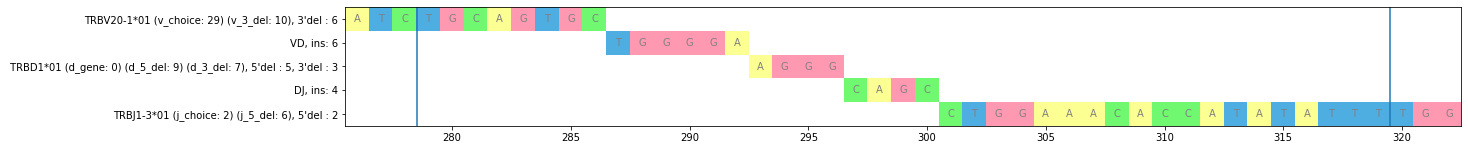

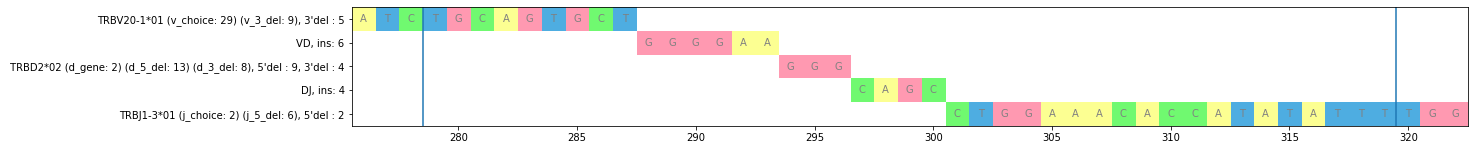

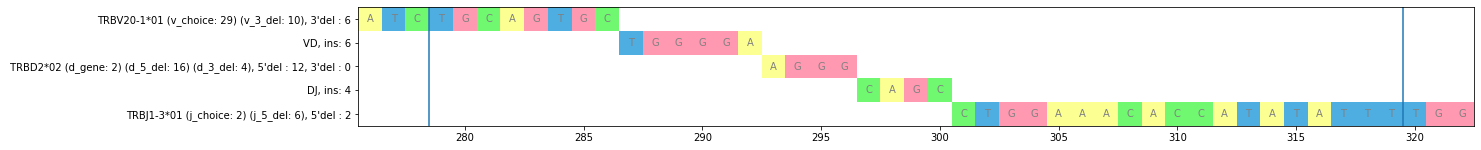

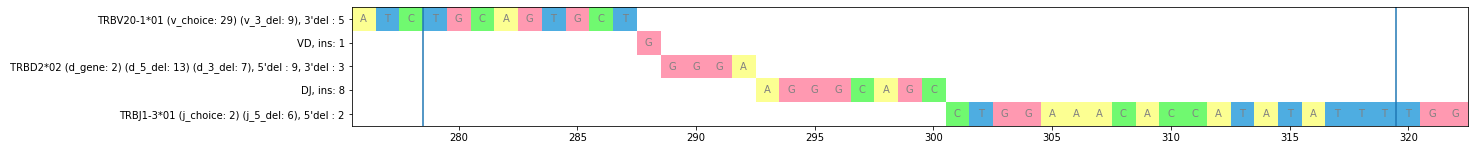

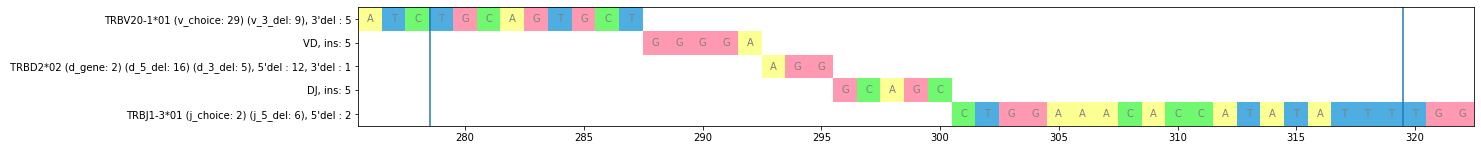

In [64]:
for ii, ps_scenario in df_scenarios.iterrows():
    mdl_hb.plot_scenario(ps_scenario) #, nt_lim=(200,340))

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

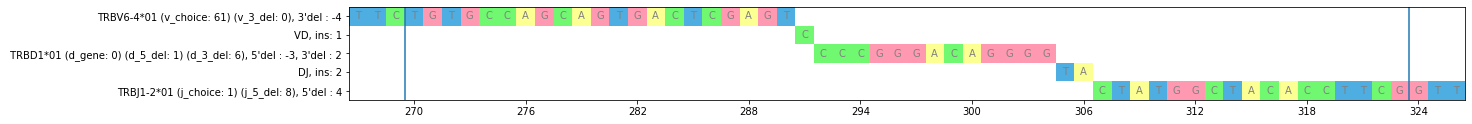

In [65]:
import pandas as pd
dict_scenario_fict = {
            'scenario_rank' : 1,
            'scenario_proba_cond_seq' : 0.9999,
            'v_choice' : 61,
            'j_choice' : 1,
            'd_gene' : 0,
            'v_3_del': 0,
            'd_5_del': 1,
            'j_5_del': 8,
            'd_3_del': 6,
            'vd_ins' : 1,
            'vd_dinucl': [1],
            'dj_ins': 2,
            'dj_dinucl': [0, 3],
            'Mismatches' : [],
            'norm_scenario_proba_cond_seq': 0.000225
        }
ps_scenario_fict = pd.Series(dict_scenario_fict)
mdl_hb.plot_scenario(ps_scenario_fict)

In [66]:
df_scenario_aln_fict = mdl_hb.get_df_scenario_aln_from_scenario(ps_scenario_fict)
df_scenario_aln_fict
mdl_hb.get_gene_segment_dict('V', ps_scenario)

OrderedDict([('gene_template',
              'GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTGGAACCTCTGTGAAGATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGTATCGTCAGTTCCCGAAACAGAGTCTCATGCTGATGGCAACTTCCAATGAGGGCTCCAAGGCCACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATGCAAGCCTGACCTTGTCCACTCTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCTAGAGA'),
             ('int_gene_5_del', 0),
             ('int_gene_3_del', 5),
             ('palindrome_5_end', ''),
             ('gene_ini', 0),
             ('gene_end', 288),
             ('gene_cut',
              'GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTGGAACCTCTGTGAAGATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGTATCGTCAGTTCCCGAAACAGAGTCTCATGCTGATGGCAACTTCCAATGAGGGCTCCAAGGCCACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATGCAAGCCTGACCTTGTCCACTCTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCT'),
             ('palindrome_3_end', ''),
             ('gene_segment',
              'GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTGGAACCTCTGTGAAGATCGAGT

In [67]:
mdl_hb.parms['d_gene']

,value,name
id,,
0,GGGACAGGGGGC,TRBD1*01
1,GGGACTAGCGGGGGGG,TRBD2*01
2,GGGACTAGCGGGAGGG,TRBD2*02


In [68]:
help(mdl_hb.plot_scenario)

Help on method plot_scenario in module pygor3.IgorIO:

plot_scenario(ps_scenario, nt_lim: Union[NoneType, tuple, list] = None, show_CDR3=True, ax=None) method of pygor3.IgorIO.IgorModel instance
    Return matplotlib fig, ax
    :param ps_scenario: Pandas Series scenario
    :param nt_lim:Union[None,tuple,list] region limits to show the scenario alignment
    default give boundaries around CDR3, if no anchors in model, show the whole scenario
    :param show_CDR3: Show CDR3 lines default(=True)



# Observables from scenarios

## Predefine Functions for Scenarios

In [69]:
fln_scenarios = "best_scenarios_counts.csv"
df_scenarios_many = mdl_hb.get_dataframe_scenarios(fln_scenarios)

igor_fln_generated_realizations_werr:  best_scenarios_counts.csv


### Pairwise Probabilities

In [70]:
help(mdl_hb.get_P_from_scenarios_cols)

Help on method get_P_from_scenarios_cols in module pygor3.IgorIO:

get_P_from_scenarios_cols(df_scenarios, colname_list) method of pygor3.IgorIO.IgorModel instance
    Return xarray with marginalize probabilities of listed columns in dataframe scenarios df_scenarios
    :param df_scenarios: Scenarios with normalize probability. Loaded with self.get_dataframe_scenarios()
    :param colname_list: List of variables preserve for marginalization



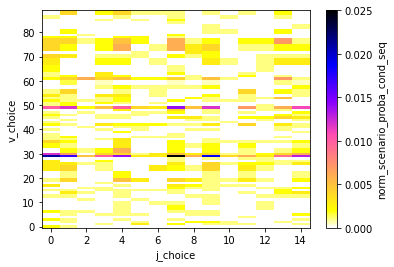

In [71]:
Pjoint_V_J_scens = mdl_hb.get_P_from_scenarios_cols(df_scenarios_many, ['v_choice', 'j_choice'])
Pjoint_V_J_scens.plot(cmap='gnuplot2_r')

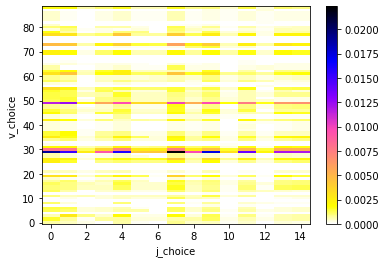

In [72]:
mdl_hb.get_P_joint(['v_choice', 'j_choice']).plot(cmap='gnuplot2_r')

### Mutual Information from scenarios

In [73]:
help(mdl_hb.get_mutual_information_events_from_df_scenarios)

Help on method get_mutual_information_events_from_df_scenarios in module pygor3.IgorIO:

get_mutual_information_events_from_df_scenarios(df_scenarios, event_nickname_x, event_nickname_y) method of pygor3.IgorIO.IgorModel instance
    Return mutual information in log10 of the desired events



In [74]:
mdl_hb.get_mutual_information_events_from_df_scenarios(df_scenarios_many, 'v_choice', 'j_choice')

mutual_information ( v_choice ,  j_choice ):  0.6392623620052954


<xarray.DataArray 'norm_scenario_proba_cond_seq' ()>
array(0.63926236)

In [75]:
da_mi_scenarios = mdl_hb.get_mutual_information_from_df_scenarios(df_scenarios_many)

mutual_information ( v_choice ,  j_choice ):  0.6392623620052954
mutual_information ( v_choice ,  d_gene ):  0.08894391386660068
mutual_information ( v_choice ,  v_3_del ):  0.7021801087511944
mutual_information ( v_choice ,  d_5_del ):  0.35886454309758736
mutual_information ( v_choice ,  j_5_del ):  0.4667910640736827
mutual_information ( v_choice ,  d_3_del ):  0.3381390129055559
mutual_information ( v_choice ,  vd_ins ):  0.36950632876861056
mutual_information ( v_choice ,  dj_ins ):  0.34050716113668833
mutual_information ( j_choice ,  d_gene ):  0.16839619808892387
mutual_information ( j_choice ,  v_3_del ):  0.1373839342864651
mutual_information ( j_choice ,  d_5_del ):  0.11353204598699257
mutual_information ( j_choice ,  j_5_del ):  0.44550937210770414
mutual_information ( j_choice ,  d_3_del ):  0.11443530326748617
mutual_information ( j_choice ,  vd_ins ):  0.11203857283894578
mutual_information ( j_choice ,  dj_ins ):  0.09776360260846355
mutual_information ( d_gene ,  v_3_

In [76]:
da_mi_scenarios#.to_dataframe().dropna()

<xarray.DataArray 'mutual_information' (x: 9, y: 9)>
array([[0.        , 0.63926236, 0.08894391, 0.70218011, 0.35886454,
        0.46679106, 0.33813901, 0.36950633, 0.34050716],
       [0.63926236, 0.        , 0.1683962 , 0.13738393, 0.11353205,
        0.44550937, 0.1144353 , 0.11203857, 0.0977636 ],
       [0.08894391, 0.1683962 , 0.        , 0.01724109, 0.36172414,
        0.02186478, 0.22353113, 0.01319444, 0.01294449],
       [0.70218011, 0.13738393, 0.01724109, 0.        , 0.06598438,
        0.09843108, 0.06941839, 0.10582383, 0.07374102],
       [0.35886454, 0.11353205, 0.36172414, 0.06598438, 0.        ,
        0.08378407, 0.49501981, 0.10780812, 0.07617536],
       [0.46679106, 0.44550937, 0.02186478, 0.09843108, 0.08378407,
        0.        , 0.08559953, 0.07299823, 0.10957597],
       [0.33813901, 0.1144353 , 0.22353113, 0.06941839, 0.49501981,
        0.08559953, 0.        , 0.06822031, 0.08640308],
       [0.36950633, 0.11203857, 0.01319444, 0.10582383, 0.10780812,
        0.07299823, 0.06822031, 0.        , 0.06747319],
       [0.34050716, 0.0977636 , 0.01294449, 0.07374102, 0.07617536,
        0.10957597, 0.08640308, 0.06747319, 0.        ]])
Coordinates:
  * x        (x) <U8 'v_choice' 'j_choice' 'd_gene' ... 'vd_ins' 'dj_ins'
  * y        (y) <U8 'v_choice' 'j_choice' 'd_gene' ... 'vd_ins' 'dj_ins'

<AxesSubplot:>

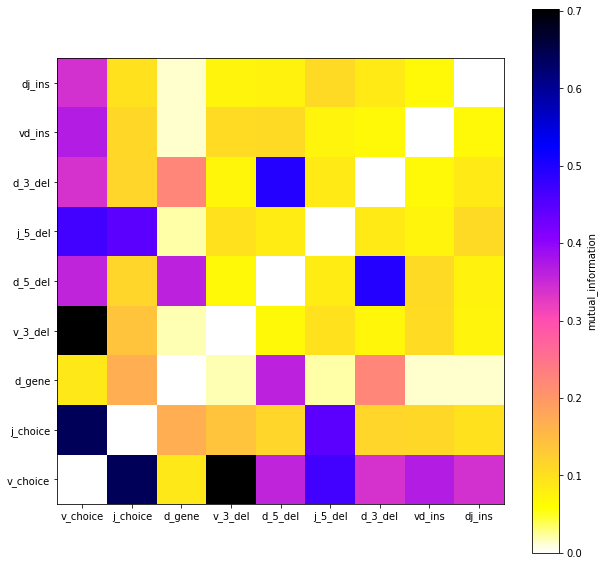

In [77]:
mdl_hb.plot_mutual_information(da_mi_scenarios)

<AxesSubplot:>

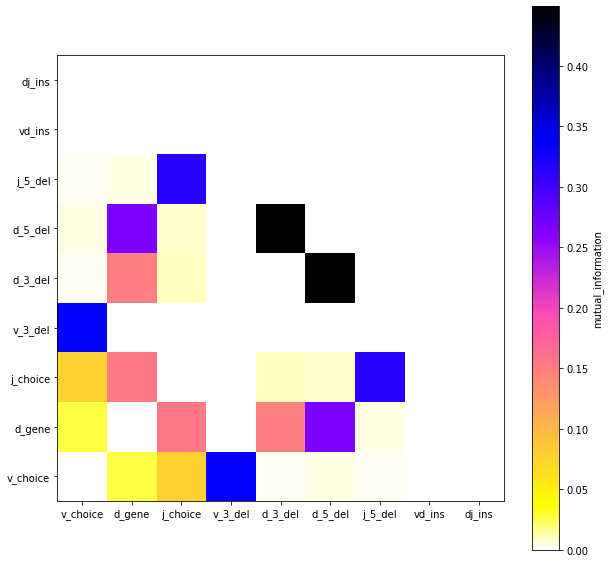

In [78]:
mdl_hb.plot_mutual_information(da_mi)

### Mean and Variance of values in scenarios dataframe

The simplest way to get the realization values of events in scenario is using the function
IgorModel.get_realization_value_from_df_scenarios(df_scenarios, 'event_nickname')

In [79]:
help(mdl_hb.get_realization_value_from_df_scenarios)

Help on method get_realization_value_from_df_scenarios in module pygor3.IgorIO:

get_realization_value_from_df_scenarios(df_scenarios, event_nickname) method of pygor3.IgorIO.IgorModel instance



In [80]:
mdl_hb.get_realization_value_from_df_scenarios(df_scenarios_many, 'd_gene')

seq_index
998        GGGACAGGGGGC
998        GGGACAGGGGGC
998        GGGACAGGGGGC
998        GGGACAGGGGGC
998        GGGACAGGGGGC
             ...       
703    GGGACTAGCGGGGGGG
703    GGGACTAGCGGGGGGG
703    GGGACTAGCGGGGGGG
703        GGGACAGGGGGC
703        GGGACAGGGGGC
Length: 10000, dtype: object

In [81]:
mdl_hb.get_realization_value_from_df_scenarios(df_scenarios_many, 'j_5_del')

seq_index
998    15
998    15
998    15
998    15
998    15
       ..
703     4
703     5
703     4
703     4
703     4
Length: 10000, dtype: int64

If the values are assigned to a column in scenarios dataframe (df_scenarios_many) the weighted average can be calculated using the IgorModel.w_mean_df_scenarios

In [82]:
ps_j_5_del = mdl_hb.get_realization_value_from_df_scenarios(df_scenarios_many, 'j_5_del')
df_scenarios_many['j_5_del_value'] = ps_j_5_del
# ps_j_5_del

In [83]:
help(mdl_hb.w_mean_df_scenarios)
help(mdl_hb.w_variance_df_scenarios)

Help on method w_mean_df_scenarios in module pygor3.IgorIO:

w_mean_df_scenarios(column_name: str, df_scenarios: pandas.core.frame.DataFrame) method of pygor3.IgorIO.IgorModel instance
    Return weighted mean with the normalized probabilities for each
    scenario (norm_scenario_proba_cond_seq)
    :param column_name: column name of df_scenario to calculate the average
    :param df_scenarios: Scenarios with normalize probability. Loaded with self.get_dataframe_scenarios()

Help on method w_variance_df_scenarios in module pygor3.IgorIO:

w_variance_df_scenarios(colname_1: str, df_scenarios: pandas.core.frame.DataFrame) method of pygor3.IgorIO.IgorModel instance
    Return weighted covariance with the normalized probabilities of the column names given for each
    scenario (norm_scenario_proba_cond_seq)
    :param colname_1: column name of df_scenario to calculate the weighted covariance
    :param colname_2: column name of df_scenario to calculate the weighted covariance
    :param df

In [84]:
mdl_hb.w_mean_df_scenarios('j_5_del_value', df_scenarios_many)

4.157669017539739

In [85]:
mdl_hb.w_variance_df_scenarios('j_5_del_value', df_scenarios_many)

10.537416194979743

In [86]:
help(mdl_hb.get_observable_from_df_scenarios)

Help on method get_observable_from_df_scenarios in module pygor3.IgorIO:

get_observable_from_df_scenarios(observable_function, df_scenarios: pandas.core.frame.DataFrame) method of pygor3.IgorIO.IgorModel instance
    Return a pandas series with the calculated observable over the df_scenarios dataframe.
    :param observable_function: This function should use the varibles with self.realization
    :param df_scenarios: Scenarios dataframe loaded with self.get_dataframe_scenarios.



In [87]:
def f_total_insertions(ps_scenario):
    my_internal = np.zeros(len(mdl.parms['vd_ins']))
    vd_ins = mdl.realization(ps_scenario, 'vd_ins')
    dj_ins = mdl.realization(ps_scenario, 'dj_ins')
    # my_internal[vd_ins.id] = 1
    # return my_internal 
    return vd_ins.value + dj_ins.value

def f_total_deletions(ps_scenario):
    v_3_del = mdl.realization(ps_scenario, 'v_3_del')
    d_5_del = mdl.realization(ps_scenario, 'd_5_del')
    d_3_del = mdl.realization(ps_scenario, 'd_3_del')
    j_5_del = mdl.realization(ps_scenario, 'j_5_del')
    return v_3_del.value + d_5_del.value + d_3_del.value + j_5_del.value

In [88]:
mean_insertions = mdl.w_average_function_df_scenarios(f_total_insertions, df_scenarios_many)
mean_deletions = mdl.w_average_function_df_scenarios(f_total_deletions, df_scenarios_many)

In [89]:
mean_insertions, mean_deletions

(10.202437426325016, 15.645906964009958)

In [90]:
def f_give_thename(ps_scenario):
    v_choice = mdl_hb.realization(ps_scenario, 'v_choice')
    return v_choice

In [91]:
mdl_hb.get_observable_from_df_scenarios(f_give_thename, df_scenarios=df_scenarios_many)

seq_index
998    TRBV7-4*01;GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGT...
998    TRBV7-4*01;GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGT...
998    TRBV7-4*01;GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGT...
998    TRBV7-4*01;GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGT...
998    TRBV7-4*01;GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGT...
                             ...                        
703    TRBV4-1*01;ACTGAAGTTACCCAGACACCAAAACACCTGGTCAT...
703    TRBV4-1*01;ACTGAAGTTACCCAGACACCAAAACACCTGGTCAT...
703    TRBV4-1*01;ACTGAAGTTACCCAGACACCAAAACACCTGGTCAT...
703    TRBV4-1*01;ACTGAAGTTACCCAGACACCAAAACACCTGGTCAT...
703    TRBV4-1*01;ACTGAAGTTACCCAGACACCAAAACACCTGGTCAT...
Length: 10000, dtype: object

In [92]:
df_scenarios_many['v_call'] = mdl_hb.get_observable_from_df_scenarios(f_give_thename, df_scenarios=df_scenarios_many)
df_scenarios_many

,scenario_rank,scenario_proba_cond_seq,v_choice,j_choice,d_gene,v_3_del,d_5_del,j_5_del,d_3_del,vd_ins,vd_dinucl,dj_ins,dj_dinucl,Mismatches,norm_scenario_proba_cond_seq,j_5_del_value,v_call
seq_index,,,,,,,,,,,,,,,,,
998,1,0.783497,77,4,0,9,6,19,9,4,"[1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000801,15,TRBV7-4*01;GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGT...
998,2,0.076884,77,4,0,9,6,19,10,4,"[1, 1, 2, 3]",8,"[2, 2, 2, 2, 0, 2, 0, 2]",[],0.000079,15,TRBV7-4*01;GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGT...
998,3,0.043634,77,4,0,9,7,19,9,5,"[1, 1, 2, 3, 2]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000045,15,TRBV7-4*01;GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGT...
998,4,0.023517,77,4,0,10,6,19,9,5,"[1, 1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000024,15,TRBV7-4*01;GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGT...
998,5,0.021809,77,4,0,9,8,19,9,6,"[1, 1, 2, 3, 2, 0]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000022,15,TRBV7-4*01;GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,6,0.021822,45,12,1,6,11,8,7,6,"[2, 2, 1, 0, 3, 3]",5,"[2, 0, 3, 1, 1]",[],0.000030,4,TRBV4-1*01;ACTGAAGTTACCCAGACACCAAAACACCTGGTCAT...
703,7,0.016150,45,12,1,5,11,9,7,5,"[2, 1, 0, 3, 3]",6,"[2, 2, 0, 3, 1, 1]",[],0.000022,5,TRBV4-1*01;ACTGAAGTTACCCAGACACCAAAACACCTGGTCAT...
703,8,0.013252,45,12,1,5,11,8,8,5,"[2, 1, 0, 3, 3]",6,"[2, 0, 3, 1, 1, 2]",[],0.000018,4,TRBV4-1*01;ACTGAAGTTACCCAGACACCAAAACACCTGGTCAT...


In [93]:
ps_scenario = df_scenarios_many.iloc[0]
realiz = mdl_hb.realization(ps_scenario, 'v_choice')
realiz.value, realiz.id, realiz.name

('GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGTCGCAAAGAGGGGACGGGATGTAGCTCTCAGGTGTGATTCAATTTCGGGTCATGTAACCCTTTATTGGTACCGACAGACCCTGGGGCAGGGCTCAGAGGTTCTGACTTACTCCCAGAGTGATGCTCAACGAGACAAATCAGGGCGGCCCAGTGGTCGGTTCTCTGCAGAGAGGCCTGAGAGATCCGTCTCCACTCTGAAGATCCAGCGCACAGAGCAGGGGGACTCAGCTGTGTATCTCTGTGCCAGCAGCTTAGC',
 77,
 'TRBV7-4*01')